In [9]:
import globals as gl
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PcmPy as pcm
import seaborn as sb
from globals import chord_mapping

plt.style.use('default')

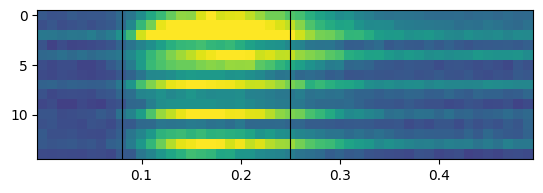

In [44]:
sn = 104
path = os.path.join(gl.baseDir, gl.behavDir, f'p{sn}_testing')
force = np.load(os.path.join(path, 'forceTMS.npy'))
force_abs_avg = np.abs(force).mean(axis=0)

fig, ax = plt.subplots()

tAx = np.linspace(0, .5, 51)

ax.imshow(force_abs_avg, vmin=0, vmax=.2)
ax.axvline(10, color='k', lw=.8)
ax.axvline(30, color='k', lw=.8)
ax.set_xticks([10, 20, 30, 40])
ax.set_xticklabels(tAx[[10, 20, 30, 40]])

plt.show()